In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import numpy as np
import pathlib
import random

In [2]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak\test'
There are 0 directories and 250 images in 'pizza_steak\test\pizza'
There are 0 directories and 250 images in 'pizza_steak\test\steak'
There are 2 directories and 0 images in 'pizza_steak\train'
There are 0 directories and 750 images in 'pizza_steak\train\pizza'
There are 0 directories and 750 images in 'pizza_steak\train\steak'


In [3]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [4]:
# get class names - names of folders in directory "pizza_steak/train"
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [5]:
# visualise images
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")
    return img

Image shape: (382, 512, 3)


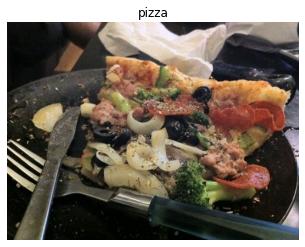

In [6]:
img = view_random_image("pizza_steak/train/", "pizza")
# tf.constant(img)

In [7]:
tf.random.set_seed(42)

# normalize data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup path to directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=5,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.Conv2D(10, 5, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 7s 100ms/step - loss: 0.6544 - accuracy: 0.6060 - val_loss: 0.5401 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4809 - accuracy: 0.7727 - val_loss: 0.3797 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4378 - accuracy: 0.7847 - val_loss: 0.4028 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.3756 - accuracy: 0.8493 - val_loss: 0.3360 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 4s 86ms/step - loss: 0.3448 - accuracy: 0.8587 - val_loss: 0.3200 - val_accuracy: 0.8600ccuracy: 0. - ETA: 1s - ETA: 0s - loss: 0.3414 - accura


# Let's replicate our model about dots

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Image shape: (384, 512, 3)
Image shape: (512, 383, 3)


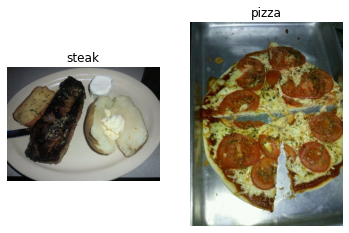

In [8]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [9]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# create data generators
train_datagen = ImageDataGenerator(rescale=1/255, dtype="float16")
test_datagen = ImageDataGenerator(rescale=1/255, dtype="float16")


In [10]:
# load images from directories and turn them into batches (to fit into memory of GPU) 32 is good batch size for CNN
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [11]:
images, labels = train_data.next() # get next batch of images/labels
len(images), len(labels)

(32, 32)

In [12]:
len(train_data) # number of batches

47

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [15]:
# Create a CNN model (start with baseline)
model_4 = Sequential([
    Conv2D(filters=10, # number of sliding windows
           kernel_size=3, # the size of sliding window
           strides=1, # sliding step size (1 is 1 pixel at a time)
           padding="valid", # "same" - output shape = input shape, "valid" - output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# The best way is to start from simple and then experiment

model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

model_4.summary()

history_4 = model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))
#callbacks=[tensorboard_callbacks]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
47/47 [==============================

Epoch 1/5
47/47 [==============================] - 5s 93ms/step - loss: 1.1129 - accuracy: 0.5667 - val_loss: 0.6518 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 4s 87ms/step - loss: 0.5298 - accuracy: 0.7367 - val_loss: 0.4870 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 4s 87ms/step - loss: 0.3863 - accuracy: 0.8447 - val_loss: 0.4595 - val_accuracy: 0.7720A: 0s -
Epoch 4/5
47/47 [==============================] - 4s 86ms/step - loss: 0.2533 - accuracy: 0.9147 - val_loss: 0.4583 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 4s 87ms/step - loss: 0.1245 - accuracy: 0.9647 - val_loss: 0.5115 - val_accuracy: 0.7720

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 10))

In [16]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="training loss")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_loss_curves(history_4)

When a model's validation loss starts to increase, it means that model is overfitting the training dataset

In [17]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

model_5.summary()

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

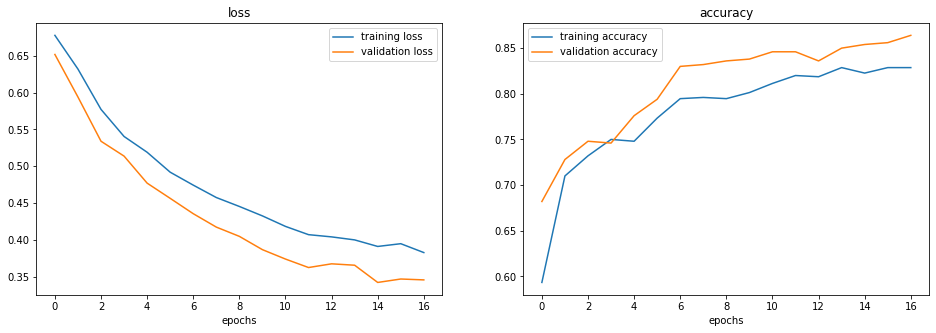

In [18]:
plot_loss_curves(history_5)

In [21]:
# Data augumentation

train_datagen_augumented = ImageDataGenerator(rescale=1/255,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

# No data augumentation
train_datagen = ImageDataGenerator(rescale=1/255)

test_datagen = ImageDataGenerator(rescale=1/255)

In [24]:
train_data = train_datagen_augumented.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
